## Exploratory Data Analysis (EDA) and Business Insights

In [1]:
import pandas as pd

# Datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# First few rows of each dataset
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")

# Basic information about each dataset
print("Customers Info:")
customers.info()

print("\nProducts Info:")
products.info()

print("\nTransactions Info:")
transactions.info()


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [2]:
# Converting date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Checking for duplicates
print("Duplicate Customers:", customers.duplicated().sum())
print("Duplicate Products:", products.duplicated().sum())
print("Duplicate Transactions:", transactions.duplicated().sum())

# Mismatches between Quantity and TotalValue
transactions['CalculatedValue'] = transactions['Quantity'] * transactions['Price']
mismatches = transactions[transactions['CalculatedValue'] != transactions['TotalValue']]
print("Mismatched Transactions:", len(mismatches))


Duplicate Customers: 0
Duplicate Products: 0
Duplicate Transactions: 0
Mismatched Transactions: 88


In [3]:
# Correcting mismatched TotalValue
transactions.loc[mismatches.index, 'TotalValue'] = transactions['CalculatedValue']

# Verifying correction
print("Remaining Mismatches:", sum(transactions['TotalValue'] != transactions['CalculatedValue']))

# Droping the helper column
transactions.drop(columns=['CalculatedValue'], inplace=True)


Remaining Mismatches: 0


Top 5 Products by Revenue:
 ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
Name: TotalValue, dtype: float64


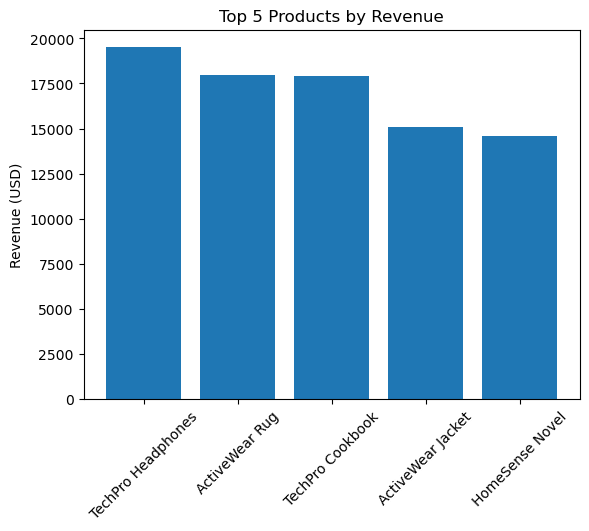

Sales by Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


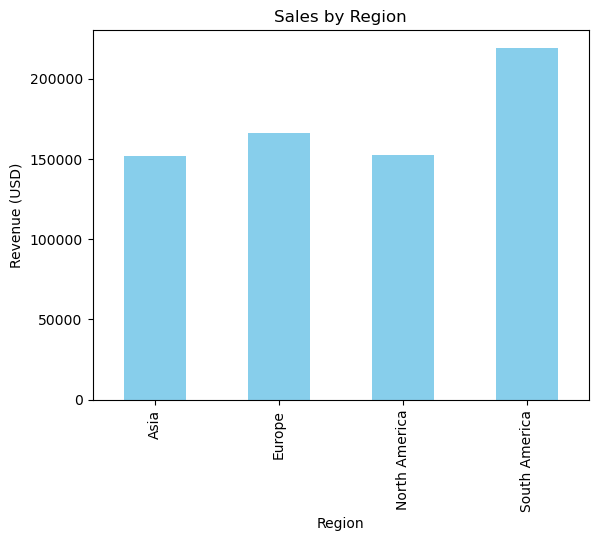

In [4]:
import matplotlib.pyplot as plt

# Top 5 products by revenue
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:\n", top_products)

# Merging product names for better visualization
top_products = top_products.reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID')

# Ploting top products by revenue
plt.bar(top_products['ProductName'], top_products['TotalValue'])
plt.title('Top 5 Products by Revenue')
plt.xticks(rotation=45)
plt.ylabel('Revenue (USD)')
plt.show()

# Sales by region
regional_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
print("Sales by Region:\n", regional_sales)

# Ploting sales by region
regional_sales.plot(kind='bar', color='skyblue', title='Sales by Region')
plt.ylabel('Revenue (USD)')
plt.show()


# 1.Analysis Results 

1.Top 5 Products by Revenue:

The products generating the highest revenue are:
P029 with $19,513.80
P079 with $17,946.91
P048 with $17,905.20
P020 with $15,060.92
P062 with $14,592.24
These products likely play a significant role in overall business profitability.

2.Sales by Region:

South America is the highest revenue-generating region with $219,352.56.
Europe follows with $166,254.63.
North America and Asia generate comparable revenue at $152,313.40 and $152,074.97, respectively.

# Business Insights

1.South America Dominates Revenue:
South America contributes the most to total revenue. This region should be prioritized for marketing and expansion strategies.

2.Product Revenue Distribution:
Products like P029 and P079 are key revenue drivers. Focus on stocking and promoting these products further.

3.Balanced Revenue Across Regions:
Apart from South America, the other three regions (Asia, Europe, North America) contribute nearly evenly, indicating a strong presence in diverse markets.

4.Top Product Strategies:
Emphasize cross-selling and bundling with P029, P079, and P048, as they drive high revenue.

5.Potential Areas for Growth:
Asia and North America, with similar revenues, can be explored further for market penetration.

Top 5 Customers by Spending:
   CustomerID  TotalValue   CustomerName
0      C0141    10673.87   Paul Parsons
1      C0054     8040.39   Bruce Rhodes
2      C0065     7663.70   Gerald Hines
3      C0156     7634.45  William Adams
4      C0082     7572.91   Aimee Taylor
Category Analysis:
              TotalValue  Quantity
Category                         
Books         192147.47       681
Electronics   180783.50       627
Clothing      166170.66       590
Home Decor    150893.93       639


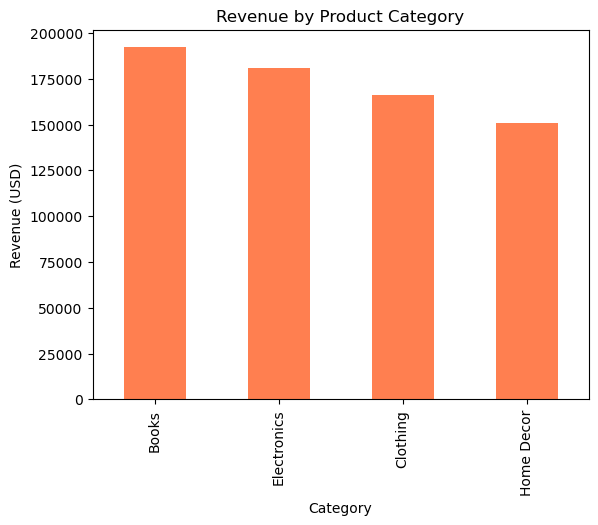

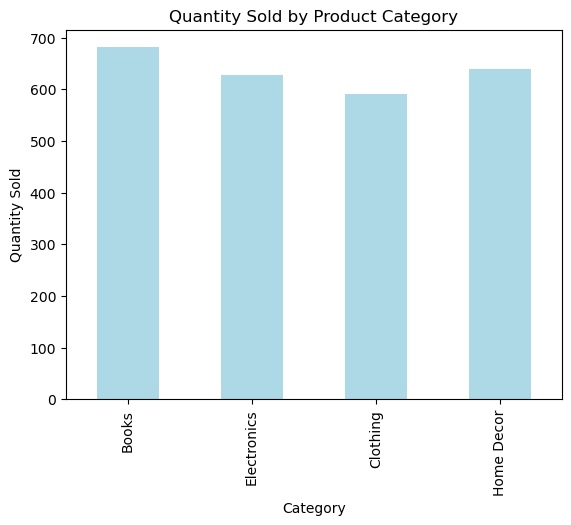

In [6]:
# total spending by each customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Merging with customer names for better understanding
customer_spending = customer_spending.reset_index().merge(customers[['CustomerID', 'CustomerName']], on='CustomerID')

# Displaying the top 5 customers
print("Top 5 Customers by Spending:\n", customer_spending.head())

# Merging transactions with products to include category information
merged_data = transactions.merge(products[['ProductID', 'Category']], on='ProductID')

# Total revenue and quantity for each category
category_analysis = merged_data.groupby('Category').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).sort_values(by='TotalValue', ascending=False)

# results
print("Category Analysis:\n", category_analysis)

# Ploting most popular categories by revenue
category_analysis['TotalValue'].plot(kind='bar', color='coral', title='Revenue by Product Category')
plt.ylabel('Revenue (USD)')
plt.show()

# Ploting most popular categories by quantity sold
category_analysis['Quantity'].plot(kind='bar', color='lightblue', title='Quantity Sold by Product Category')
plt.ylabel('Quantity Sold')
plt.show()


# 2.Analysis Results

1. Top Customers by Spending:
 The highest-spending customers are:
  1.Paul Parsons (CustomerID: C0141) - $10,673.87
  2.Bruce Rhodes (CustomerID: C0054) - $8,040.39
  3.Gerald Hines (CustomerID: C0065) - $7,663.70
  4.William Adams (CustomerID: C0156) - $7,634.45
  5.Aimee Taylor (CustomerID: C0082) - $7,572.91

These top customers can be targeted for loyalty programs or personalized promotions to retain and increase their spending.

2. Most Popular Product Categories:
 
 Revenue:
  Books generated the highest revenue at $192,147.47, followed by Electronics ($180,783.50), Clothing ($166,170.66), and Home     Decor ($150,893.93).
 
 Quantity Sold:
  Books are the most purchased category (681 units), with Home Decor (639 units) and Electronics (627 units) following closely.


# Business Insights

1.Books Lead in Revenue and Quantity:
  Books are the highest-grossing and most purchased category. Strategies to further boost book sales (e.g., discounts, bundles)   could maximize revenue.

2.Electronics and Clothing Are Key Drivers:
  Electronics and clothing are close in revenue and should be prioritized for targeted promotions and upselling opportunities.

3.Home Decor Potential:
  Though Home Decor has slightly lower revenue, its quantity sold indicates strong customer interest. Consider increasing         product variety in this category.

4.High-Spending Customers:
  Engage top customers like Paul Parsons and Bruce Rhodes with personalized offers, exclusive access to products, or loyalty       rewards.
